# Analysis of Average Household size in LA county

**Xinyi Cao**

For the group assignment, we try to analyze the discrepancy between public transit needs and current provisions. I am responsible for analyzing the distribution of household size (census tract) in LA county. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#read the file
df = pd.read_csv('/home/jovyan/Group assignment 2-xinyi/All Years Household Types Calculations.csv')

In [3]:
#see the structure of the data
df.shape

(7490, 16)

In [4]:
df.head()

,geoid,geoid20,year,denom_total_hh,denom_youth_hh,avg_hh_size,youth_singleparenthh_count,youth_singleparenthh_pct,families_children_count,families_children_pct,living_alone_count,living_alone_pct,same_sex_count,same_sex_pct,opp_sex_count,opp_sex_pct
0,1400000US06037101110,6037101110,2021,1639.0,567.0,2.54,92.0,16.225750,331.0,22.155289,615.52802,41.200001,0.0,0.000000,778.0,47.467968
1,1400000US06037101122,6037101122,2021,1426.0,686.0,3.09,176.0,25.655977,249.0,18.148687,625.63196,45.599998,25.0,1.753156,757.0,53.085552
2,1400000US06037101220,6037101220,2021,1399.0,645.0,2.64,85.0,13.178294,296.0,21.812822,378.60300,27.900000,0.0,0.000000,771.0,55.110794
3,1400000US06037101221,6037101221,2021,1556.0,645.0,2.52,167.0,25.891474,338.0,23.310345,439.34998,30.299999,0.0,0.000000,782.0,50.257069
4,1400000US06037101222,6037101222,2021,994.0,517.0,2.88,110.0,21.276596,286.0,30.588236,276.76001,29.600000,0.0,0.000000,630.0,63.380283


Check the data type and convert them to string

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geoid                       7490 non-null   object 
 1   geoid20                     7490 non-null   int64  
 2   year                        7490 non-null   int64  
 3   denom_total_hh              7410 non-null   float64
 4   denom_youth_hh              7466 non-null   float64
 5   avg_hh_size                 7408 non-null   float64
 6   youth_singleparenthh_count  7466 non-null   float64
 7   youth_singleparenthh_pct    7392 non-null   float64
 8   families_children_count     7469 non-null   float64
 9   families_children_pct       7415 non-null   float64
 10  living_alone_count          7415 non-null   float64
 11  living_alone_pct            7415 non-null   float64
 12  same_sex_count              7410 non-null   float64
 13  same_sex_pct                7410 

## Analyze the trend of average household size

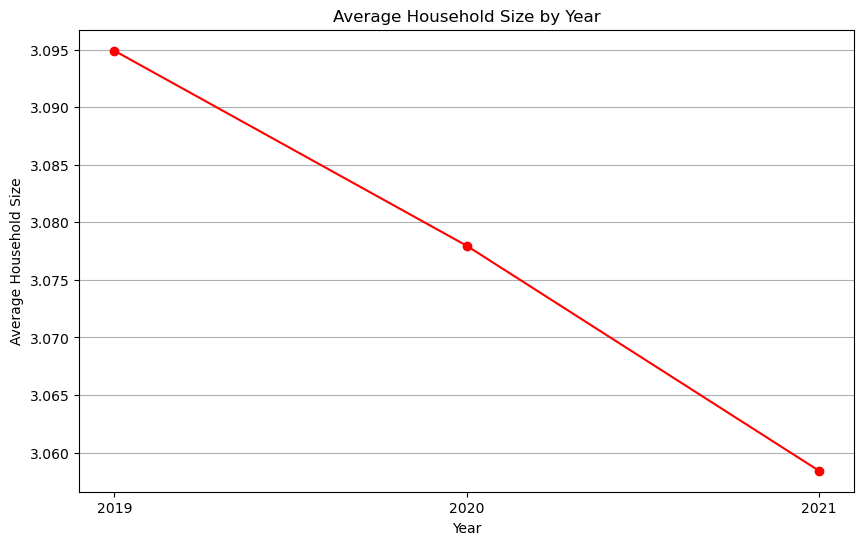

In [6]:
# Load the provided CSV file
file_path = '/home/jovyan/Group assignment 2-xinyi/All Years Household Types Calculations.csv'
data = pd.read_csv(file_path)

# Group the data by year and calculate the mean of 'avg_hh_size' for each year
grouped_avg_hh_size = data.groupby('year')['avg_hh_size'].mean()

# Create a line plot for avg_hh_size
plt.figure(figsize=(10, 6))
grouped_avg_hh_size.plot(kind='line', color='red', marker='o')
plt.title('Average Household Size by Year')
plt.xlabel('Year')
plt.ylabel('Average Household Size')
plt.xticks([2019, 2020, 2021]) 
plt.grid(axis='y')

# Show the plot
plt.show()

Plot the average household size for different year. And we can find that the average household size in LA is decreasing from 2019.

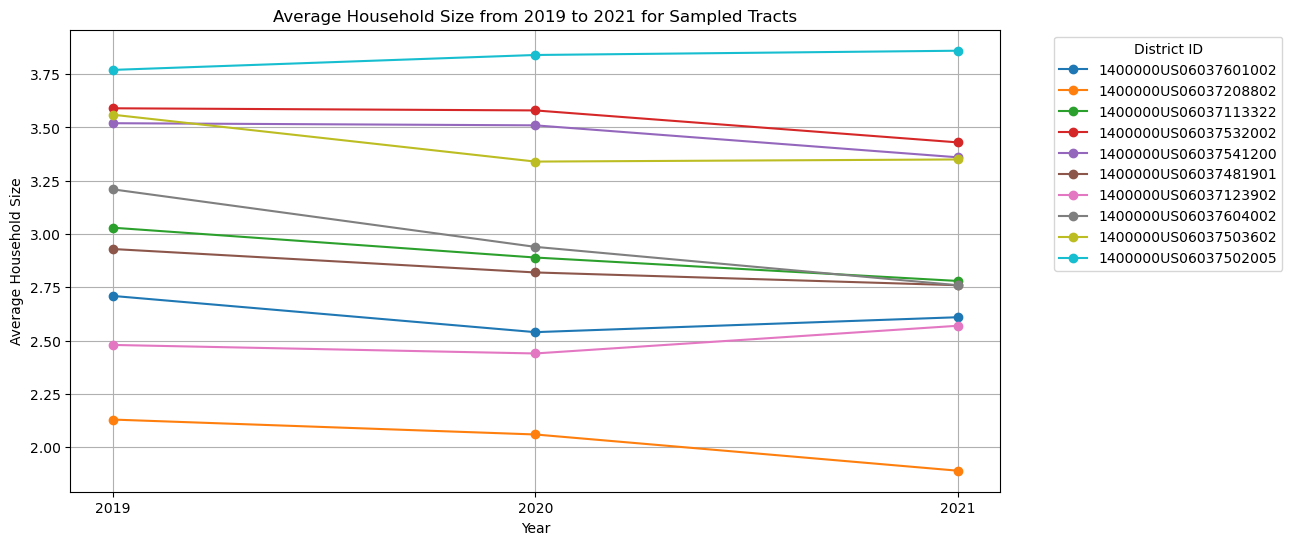

In [7]:
# Filter the data for the years 2019 to 2021
filtered_data_2019_2021 = data[data['year'].between(2019, 2021)]

# Group the data by 'geoid' (assumed as district) and 'year' and then calculating the mean
grouped_data = filtered_data_2019_2021.groupby(['geoid', 'year']).agg({'avg_hh_size': 'mean'}).reset_index()
pivot_data_district = grouped_data.pivot(index='geoid', columns='year', values='avg_hh_size')
sample_districts = pivot_data_district.sample(n=10, random_state=1)

# Plot the line chart for the sampled districts
plt.figure(figsize=(12, 6))
for index, row in sample_districts.iterrows():
    plt.plot(row.index, row, marker='o')

plt.title('Average Household Size from 2019 to 2021 for Sampled Tracts')
plt.xlabel('Year')
plt.ylabel('Average Household Size')
plt.legend(sample_districts.index, title='District ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([2019, 2020, 2021]) 
plt.grid(True)
plt.show()

Plot 10 sample tract household size from 2019 to 2021, we can find that: compared with 2019, most of the household size in most tracts decreased.

## Draw the rail stop map of the LA county

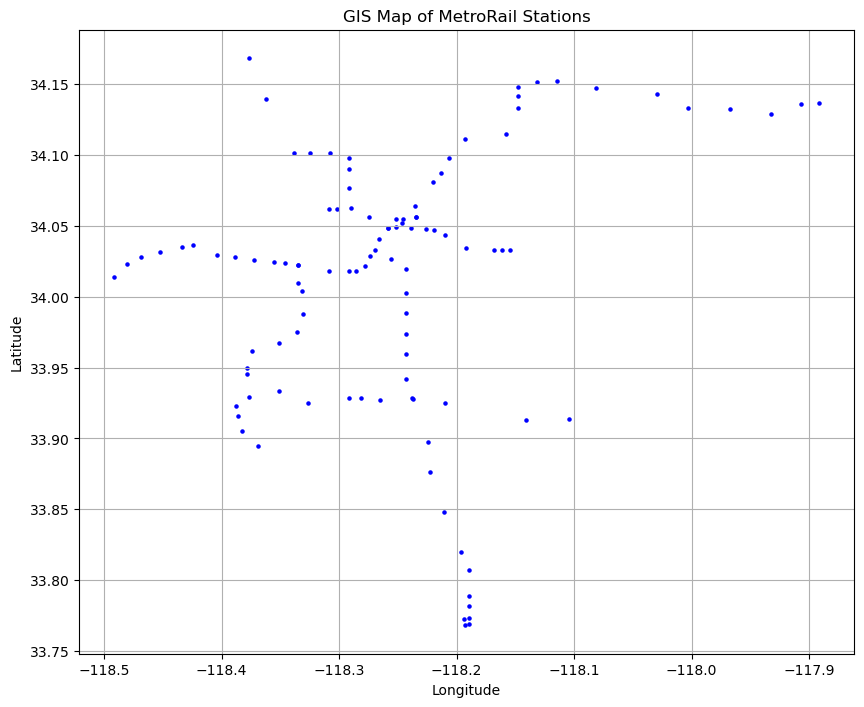

In [9]:
# Path to the shapefile
shp_file_path = '/home/jovyan/Group assignment 2-xinyi/230711_All_MetroRail_Stations.shp'

# Reading the shapefile using Geopandas
gdf = gpd.read_file(shp_file_path)

# Plotting the GIS map
plt.figure(figsize=(10, 10))
gdf.plot(ax=plt.gca(), color='blue', marker='o', markersize=5)
plt.title('GIS Map of MetroRail Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Draw the geographic distribution of the household size

In [10]:
geojson_path = '/home/jovyan/Group assignment 2-xinyi/Census_Tracts_2020.geojson'
geo_data = gpd.read_file(geojson_path)

Plot latitude and longtitude of the census tracts

<Axes: >

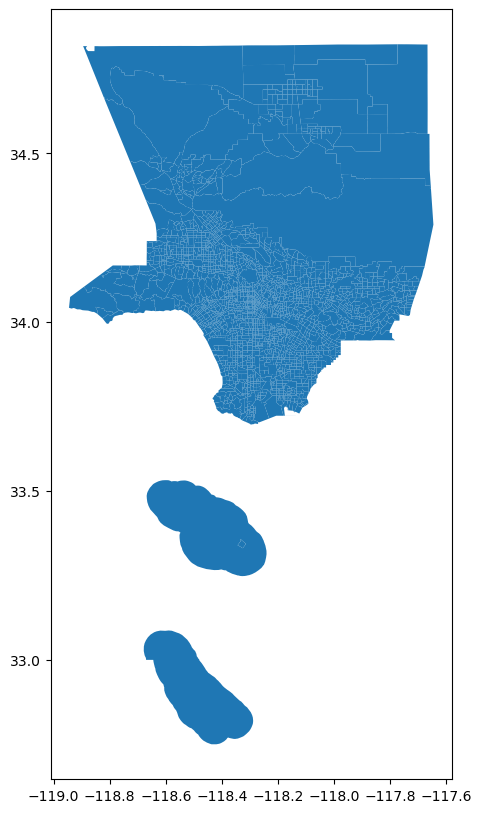

In [11]:
geo_data.plot(figsize=(12,10))

Draw the map of the metro stops in census tracts

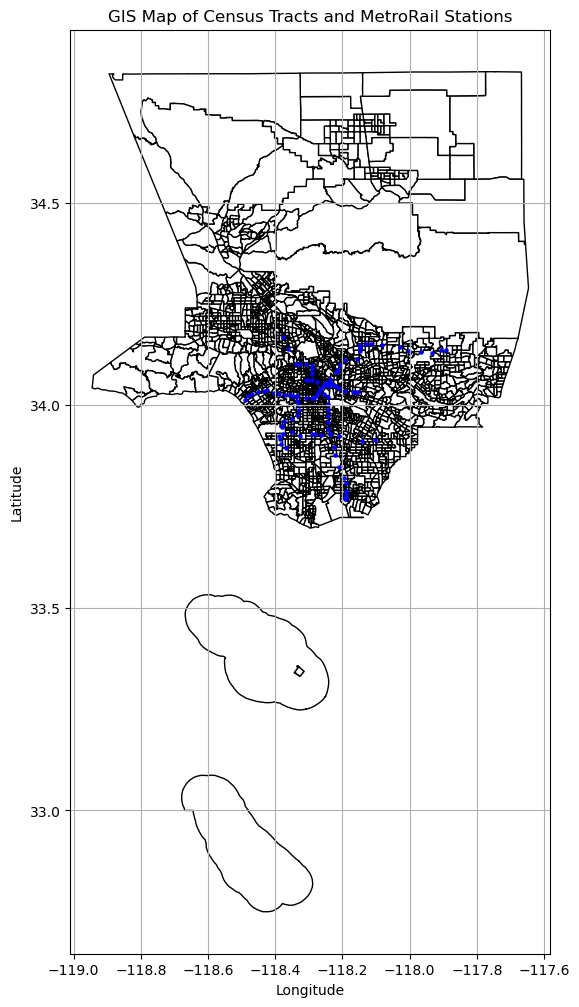

In [12]:
# Plotting both datasets on the same map
plt.figure(figsize=(12, 12))
base = geo_data.plot(ax=plt.gca(), color='white', edgecolor='black')
gdf.plot(ax=base, color='blue', marker='o', markersize=5)
plt.title('GIS Map of Census Tracts and MetroRail Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [13]:
# check the data
geo_data = geo_data[['CT20','geometry']]
geo_data.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


convert data format

In [14]:
geo_data.loc[:, 'geoid20'] = '06' + '037' + geo_data['CT20'].astype(str)
print(geo_data.head())

     CT20                                           geometry      geoid20
0  101110  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  06037101110
1  101122  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  06037101122
2  101220  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  06037101220
3  101221  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221
4  101222  POLYGON ((-118.28594 34.25405, -118.28594 34.2...  06037101222


/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


merge the two datasets

In [15]:
geo_data['geoid20'] = geo_data['geoid20'].astype(int)
data['geoid20'] = data['geoid20'].astype(int)
data_merge = geo_data.merge (data,on='geoid20')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
#check the new dataset
data_merge.head()

,CT20,geometry,geoid20,geoid,year,denom_total_hh,denom_youth_hh,avg_hh_size,youth_singleparenthh_count,youth_singleparenthh_pct,families_children_count,families_children_pct,living_alone_count,living_alone_pct,same_sex_count,same_sex_pct,opp_sex_count,opp_sex_pct
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2021,1639.0,567.0,2.54,92.0,16.225750,331.0,22.155289,615.52802,41.200001,0.0,0.000000,778.0,47.467968
1,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2020,1629.0,734.0,2.54,159.0,21.662125,394.0,26.179401,383.77499,25.500000,0.0,0.000000,791.0,48.557396
2,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2019,1749.0,874.0,2.66,247.0,28.260870,390.0,22.298456,450.00000,25.728989,0.0,0.000000,796.0,45.511723
3,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1400000US06037101122,2021,1426.0,686.0,3.09,176.0,25.655977,249.0,18.148687,625.63196,45.599998,25.0,1.753156,757.0,53.085552
4,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1400000US06037101122,2020,1406.0,606.0,3.07,67.0,11.056106,244.0,18.195377,329.88602,24.600000,14.0,0.995733,801.0,56.970127


In [17]:
# Filter the merged data for the year 2021,2020,2019
data_2021 = data_merge[data_merge['year'] == 2021]
data_2020 = data_merge[data_merge['year'] == 2020]
data_2019 = data_merge[data_merge['year'] == 2019]
data_2021.head()

,CT20,geometry,geoid20,geoid,year,denom_total_hh,denom_youth_hh,avg_hh_size,youth_singleparenthh_count,youth_singleparenthh_pct,families_children_count,families_children_pct,living_alone_count,living_alone_pct,same_sex_count,same_sex_pct,opp_sex_count,opp_sex_pct
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1400000US06037101110,2021,1639.0,567.0,2.54,92.0,16.225750,331.0,22.155289,615.52802,41.200001,0.0,0.000000,778.0,47.467968
3,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1400000US06037101122,2021,1426.0,686.0,3.09,176.0,25.655977,249.0,18.148687,625.63196,45.599998,25.0,1.753156,757.0,53.085552
6,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,1400000US06037101220,2021,1399.0,645.0,2.64,85.0,13.178294,296.0,21.812822,378.60300,27.900000,0.0,0.000000,771.0,55.110794
9,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,1400000US06037101221,2021,1556.0,645.0,2.52,167.0,25.891474,338.0,23.310345,439.34998,30.299999,0.0,0.000000,782.0,50.257069
12,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,1400000US06037101222,2021,994.0,517.0,2.88,110.0,21.276596,286.0,30.588236,276.76001,29.600000,0.0,0.000000,630.0,63.380283


<Axes: >

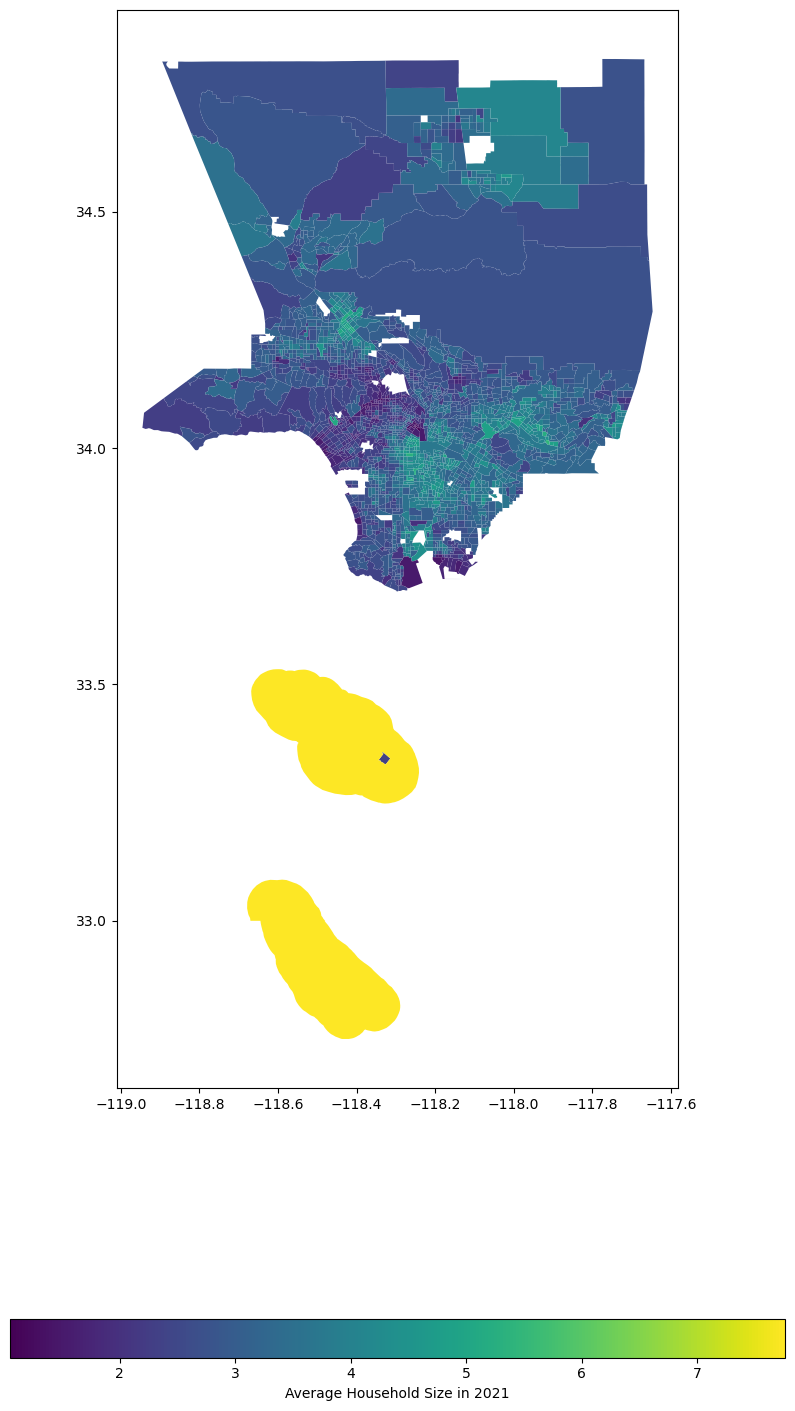

In [18]:
# Plotting the map for 2021
data_2021.plot(figsize=(10,20),
                 column='avg_hh_size',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2021", 'orientation': "horizontal"})

<Axes: >

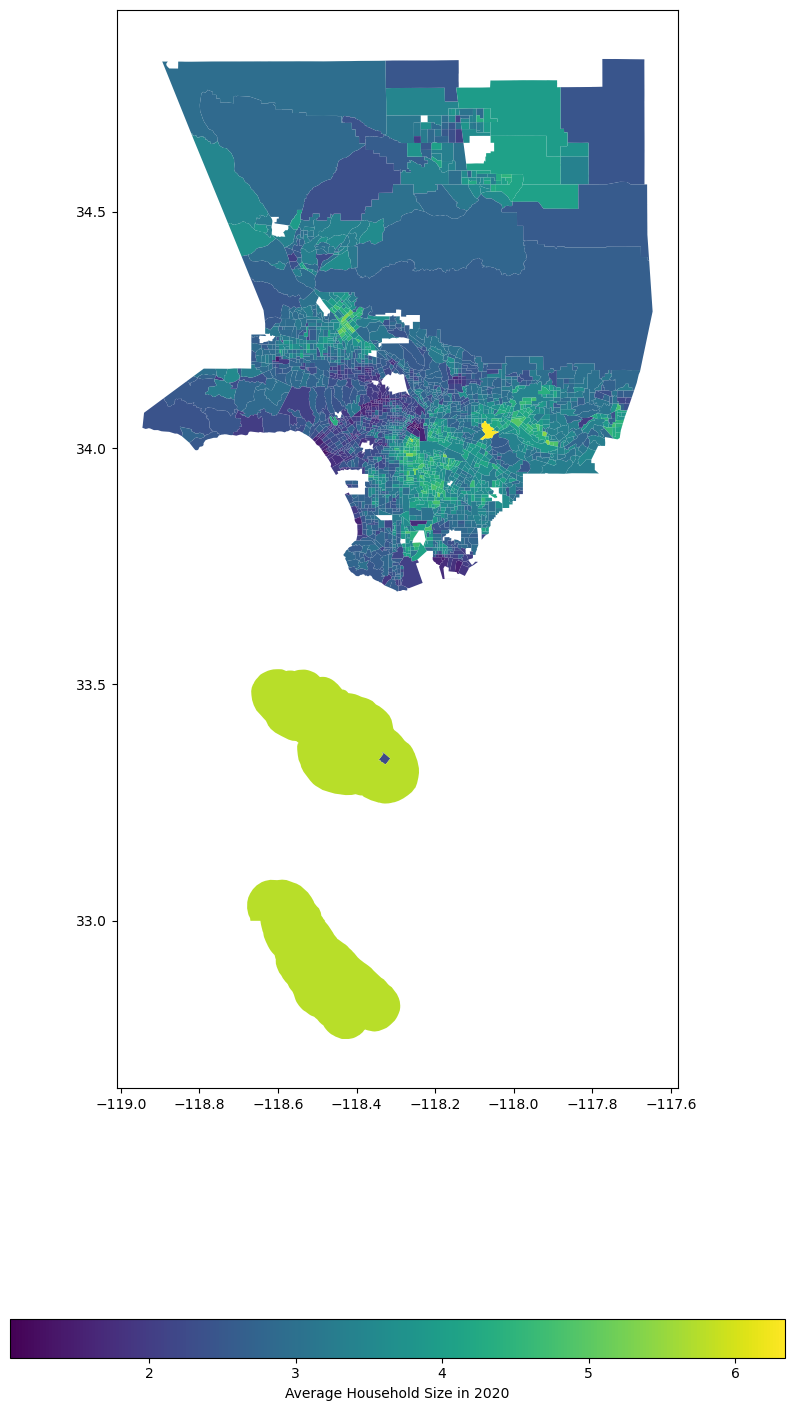

In [19]:
# Plotting the map for 2020
data_2020.plot(figsize=(10,20),
                 column='avg_hh_size',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2020", 'orientation': "horizontal"})

<Axes: >

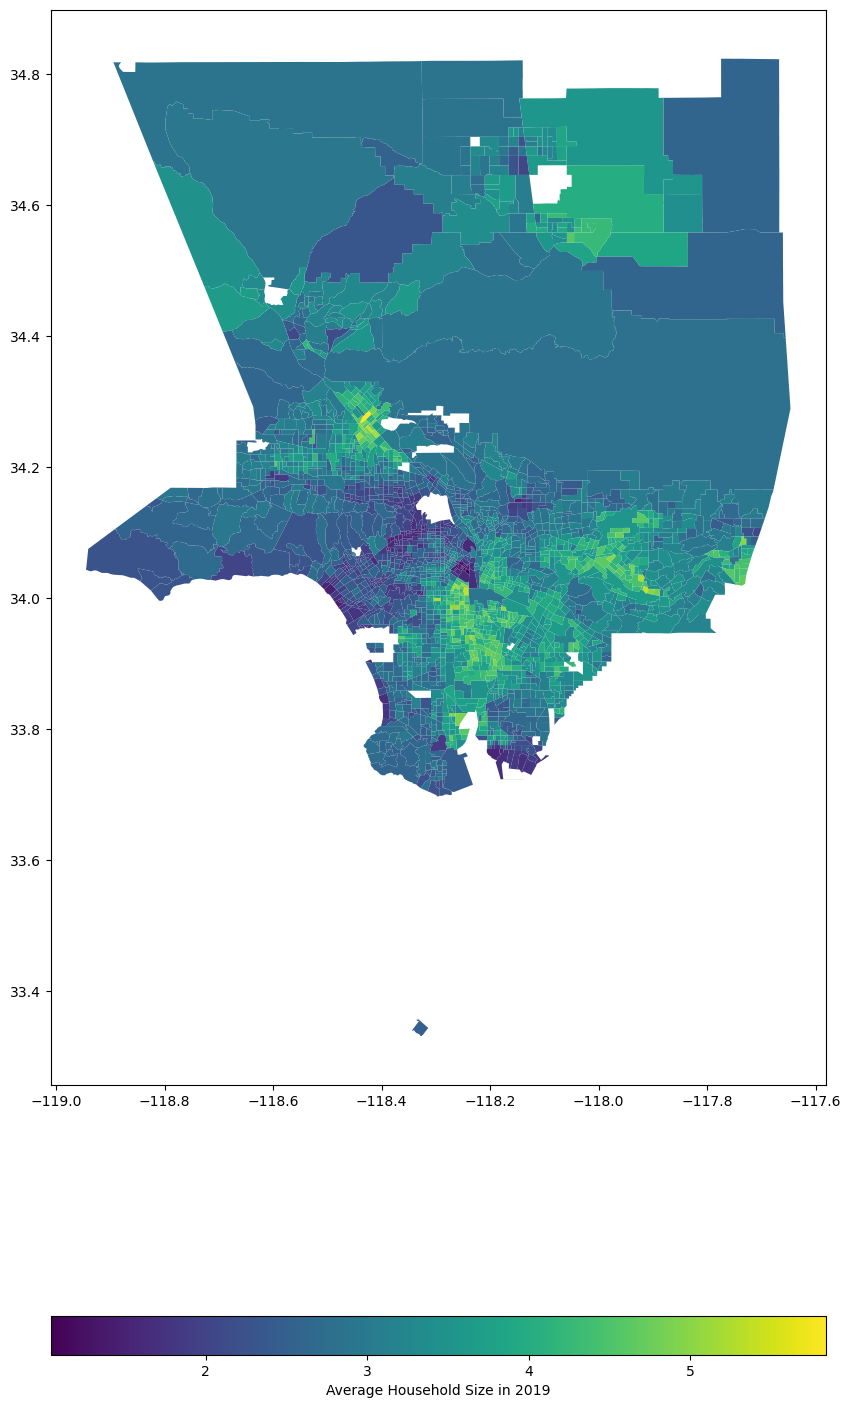

In [20]:
# Plotting the map for 2019
data_2019.plot(figsize=(10,20),
                 column='avg_hh_size',
                 legend=True,
                 legend_kwds={'label': f"Average Household Size in 2019", 'orientation': "horizontal"})

**Compared the household size in each census tract in the past 3 years, we can find that:**

The average household size decreased from 2019 to 2021 in the most of the census tracts.
In the downtown of LA, the household size is larger than that in suburb.